# PH413 Computation Physics - Practice [Week 5]

## 1.3. Numerical Integration

**==================== ★★ Assignment1 ★★ ====================**

* Generate a sequence $y(x) = {1\over{1+x^2}}$ for x = 0 ~ 1, with $dt = 0.01$



* Compare accumulated errors for following methods
    * Rectangular methods
    * Trapezoidal rules
    * RK4
    * Analytic integration
    
    
* From above results, verify the order of each method.
    * For other words, plot the accumulated errors by changing step size, and determine the power exponent.
    
**============================================================**   

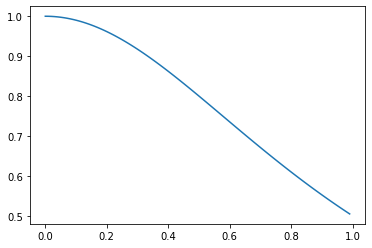

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# taken from a direct calculation
exact = np.pi / 4


def y(x):
    return 1 / (1 + x**2)
y = np.vectorize(y)

# rectengular method using a midpoint
def rect(dt):
    x = np.arange(0,1,dt)
    x = x + .5 * dt
    integral = np.sum(y(x))
    integral = integral * dt
    return integral

def trap(dt):
    x = np.arange(0 + dt, 1, dt)
    integral = y(0) + y(1)
    integral = integral + 2 * np.sum(y(x))
    integral = integral * dt/2
    return integral

# I have no idea what Runge Kutta can do for integration and could not find anything
# on the internet
# I used the weights from the numerical equation solver for integration part weights 
# however that is Simpson's method
def RK4(dt):
    x = np.arange(0 + dt, 1, dt)
    x_mid = np.arange(0 + dt/2, 1, dt)
    integral = y(0) + y(1)
    integral = integral + 2 * np.sum(y(x))
    integral = integral + 4 * np.sum(y(x_mid))
    integral = integral * dt/6
    return integral

def rect_err(dt):
    return np.abs(rect(dt) - exact)

def trap_err(dt):
    return np.abs(trap(dt) - exact)

def RK4_err(dt):
    return np.abs(RK4(dt) - exact)

rect = np.vectorize(rect)
trap = np.vectorize(trap)
rect_err = np.vectorize(rect_err)
trap_err = np.vectorize(trap_err)
RK4 = np.vectorize(RK4)
RK4_err = np.vectorize(RK4_err)



x = np.arange(0,1, .01)
plt.plot(x,y(x))

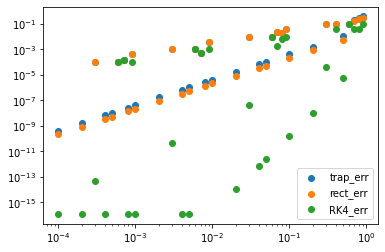

In [2]:
dt = np.arange(.1, 1, .1)
dt = 1 * dt
dt = np.append(.1 * dt, dt)
dt = np.append(.01 * dt, dt)


plt.scatter(dt, trap_err(dt), label='trap_err')
plt.scatter(dt, rect_err(dt), label='rect_err')
plt.scatter(dt, RK4_err(dt), label='RK4_err')

plt.legend()
plt.yscale('log')
plt.xscale('log')

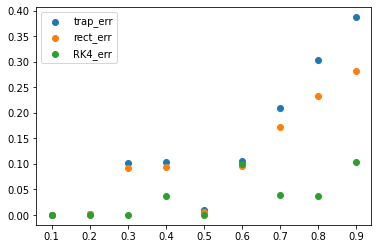

In [3]:
dt = np.arange(.1, 1, .1)


plt.scatter(dt, trap_err(dt), label='trap_err')
plt.scatter(dt, rect_err(dt), label='rect_err')
plt.scatter(dt, RK4_err(dt), label='RK4_err')

plt.legend()
#plt.yscale('log')
#plt.xscale('log')

You can not really see a an exact order, one could guess that rect is linear based on the second plot.
What is also obvious from the log log plot, is that RK4 has the highest order.

## END OF WEEK 5! Have a good day :)